In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [3]:
data = pd.read_csv("sensor.csv")

In [4]:
# drop unwanted columns
data.drop(["Unnamed: 0","sensor_15","timestamp"],axis=1,inplace=True)

In [5]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [6]:
data.tail()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,54.16052,38.05424,13.26532,420.7993,463.2318,458.3615,2.499117,676.6655,405.7680,894.5920,543.5801,1109.501,611.1745,700.5885,796.5964,692.1138,779.2067,485.0358,691.6666,974.9999,927.6135,477.3156,266.0334,578.5221,817.5707,0.0,47.13541,29.16667,71.61458,30.468750,30.208330,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,54.52602,38.53485,13.24227,422.1567,463.1928,468.4388,2.618476,676.6547,406.2575,895.5599,541.7014,1106.371,609.4917,698.4915,800.1906,697.8002,797.5571,510.9510,672.2222,927.0833,907.9463,487.8679,262.2222,568.1035,807.0151,0.0,46.87500,28.90625,73.17708,30.208332,29.947920,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,43.12836,55.11779,38.52678,13.18866,420.2166,462.4065,468.6293,2.620500,677.3162,407.1144,892.2204,542.8578,1106.698,610.9940,703.1645,800.3767,704.6601,799.3120,492.7720,689.3519,924.4791,926.8102,494.1249,260.8372,553.8872,805.5605,0.0,46.09375,28.64583,77.08333,29.947920,30.208330,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,42.35746,55.99321,38.89159,13.17346,420.5700,457.0362,459.7941,2.514596,672.6165,404.3277,887.9969,539.3630,1103.955,605.7183,697.3713,793.7070,706.9692,793.0610,490.2170,687.0370,931.7708,915.4362,484.1161,261.3184,559.4439,807.0808,0.0,45.83333,28.38542,78.64583,29.947916,30.208332,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,15.01013,42.62814,56.49642,39.40957,13.12593,421.2080,468.9915,456.5726,2.487299,676.5834,405.6293,897.8508,542.0950,1108.827,608.5364,698.0792,800.0387,703.6251,800.2143,496.4068,686.1111,917.7083,926.3979,489.0367,258.4387,558.0558,811.1204,0.0,45.31250,27.86458,77.86458,29.947916,30.208332,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [7]:
# get information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       210112 non-null  float64
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       215522 non-null  float64
 7   sensor_07       214869 non-null  float64
 8   sensor_08       215213 non-null  float64
 9   sensor_09       215725 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  sensor_14       220299 non-null  float64
 15  sensor_16       220289 non-null  float64
 16  sensor_17       220274 non-null  float64
 17  sensor_18 

In [8]:
# Check Null Values
data.isnull().sum()

sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41            27
sensor_42       

In [9]:
# Fill the null Values with median
data.fillna(data.median(),inplace=True)

In [10]:
# Check The Duplicate values in data
data.duplicated().sum()

2876

In [11]:
# Drop All Duplicate values from data
data.drop_duplicates(inplace=True)

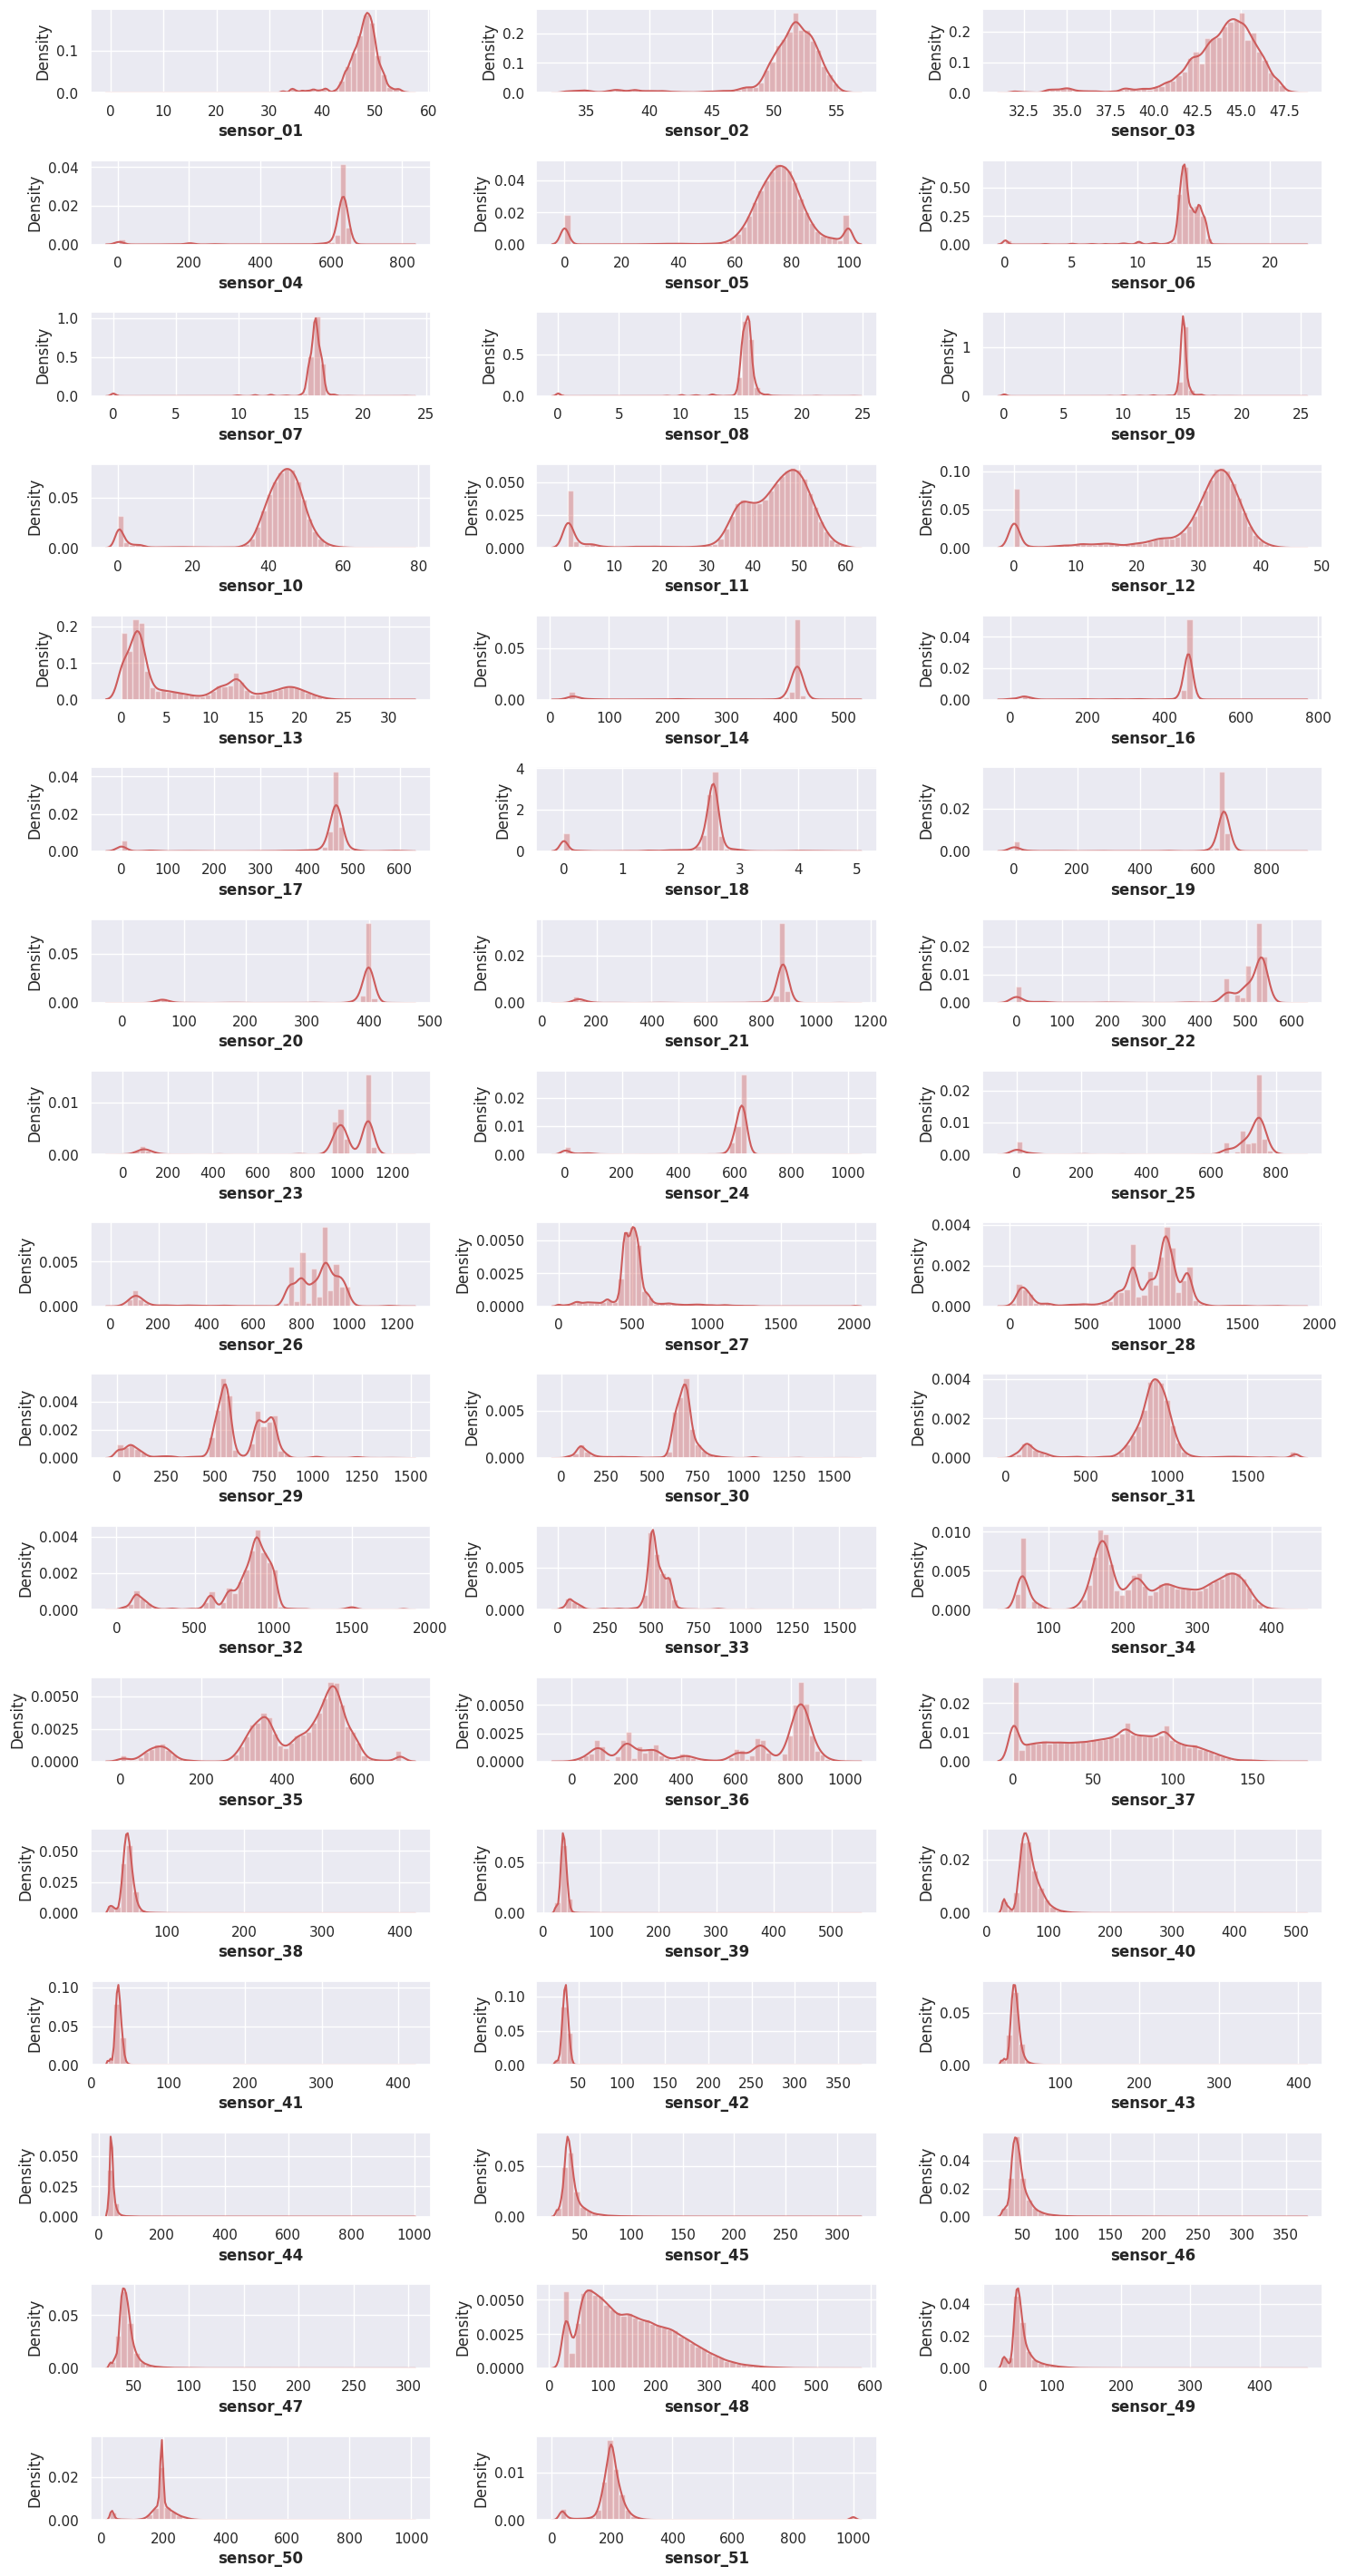

In [12]:
# let's have a look at the distribution first 50 sensors of

plt.figure(figsize=(15, 100))

for i, col in enumerate(data.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [13]:
# get the frequency of data

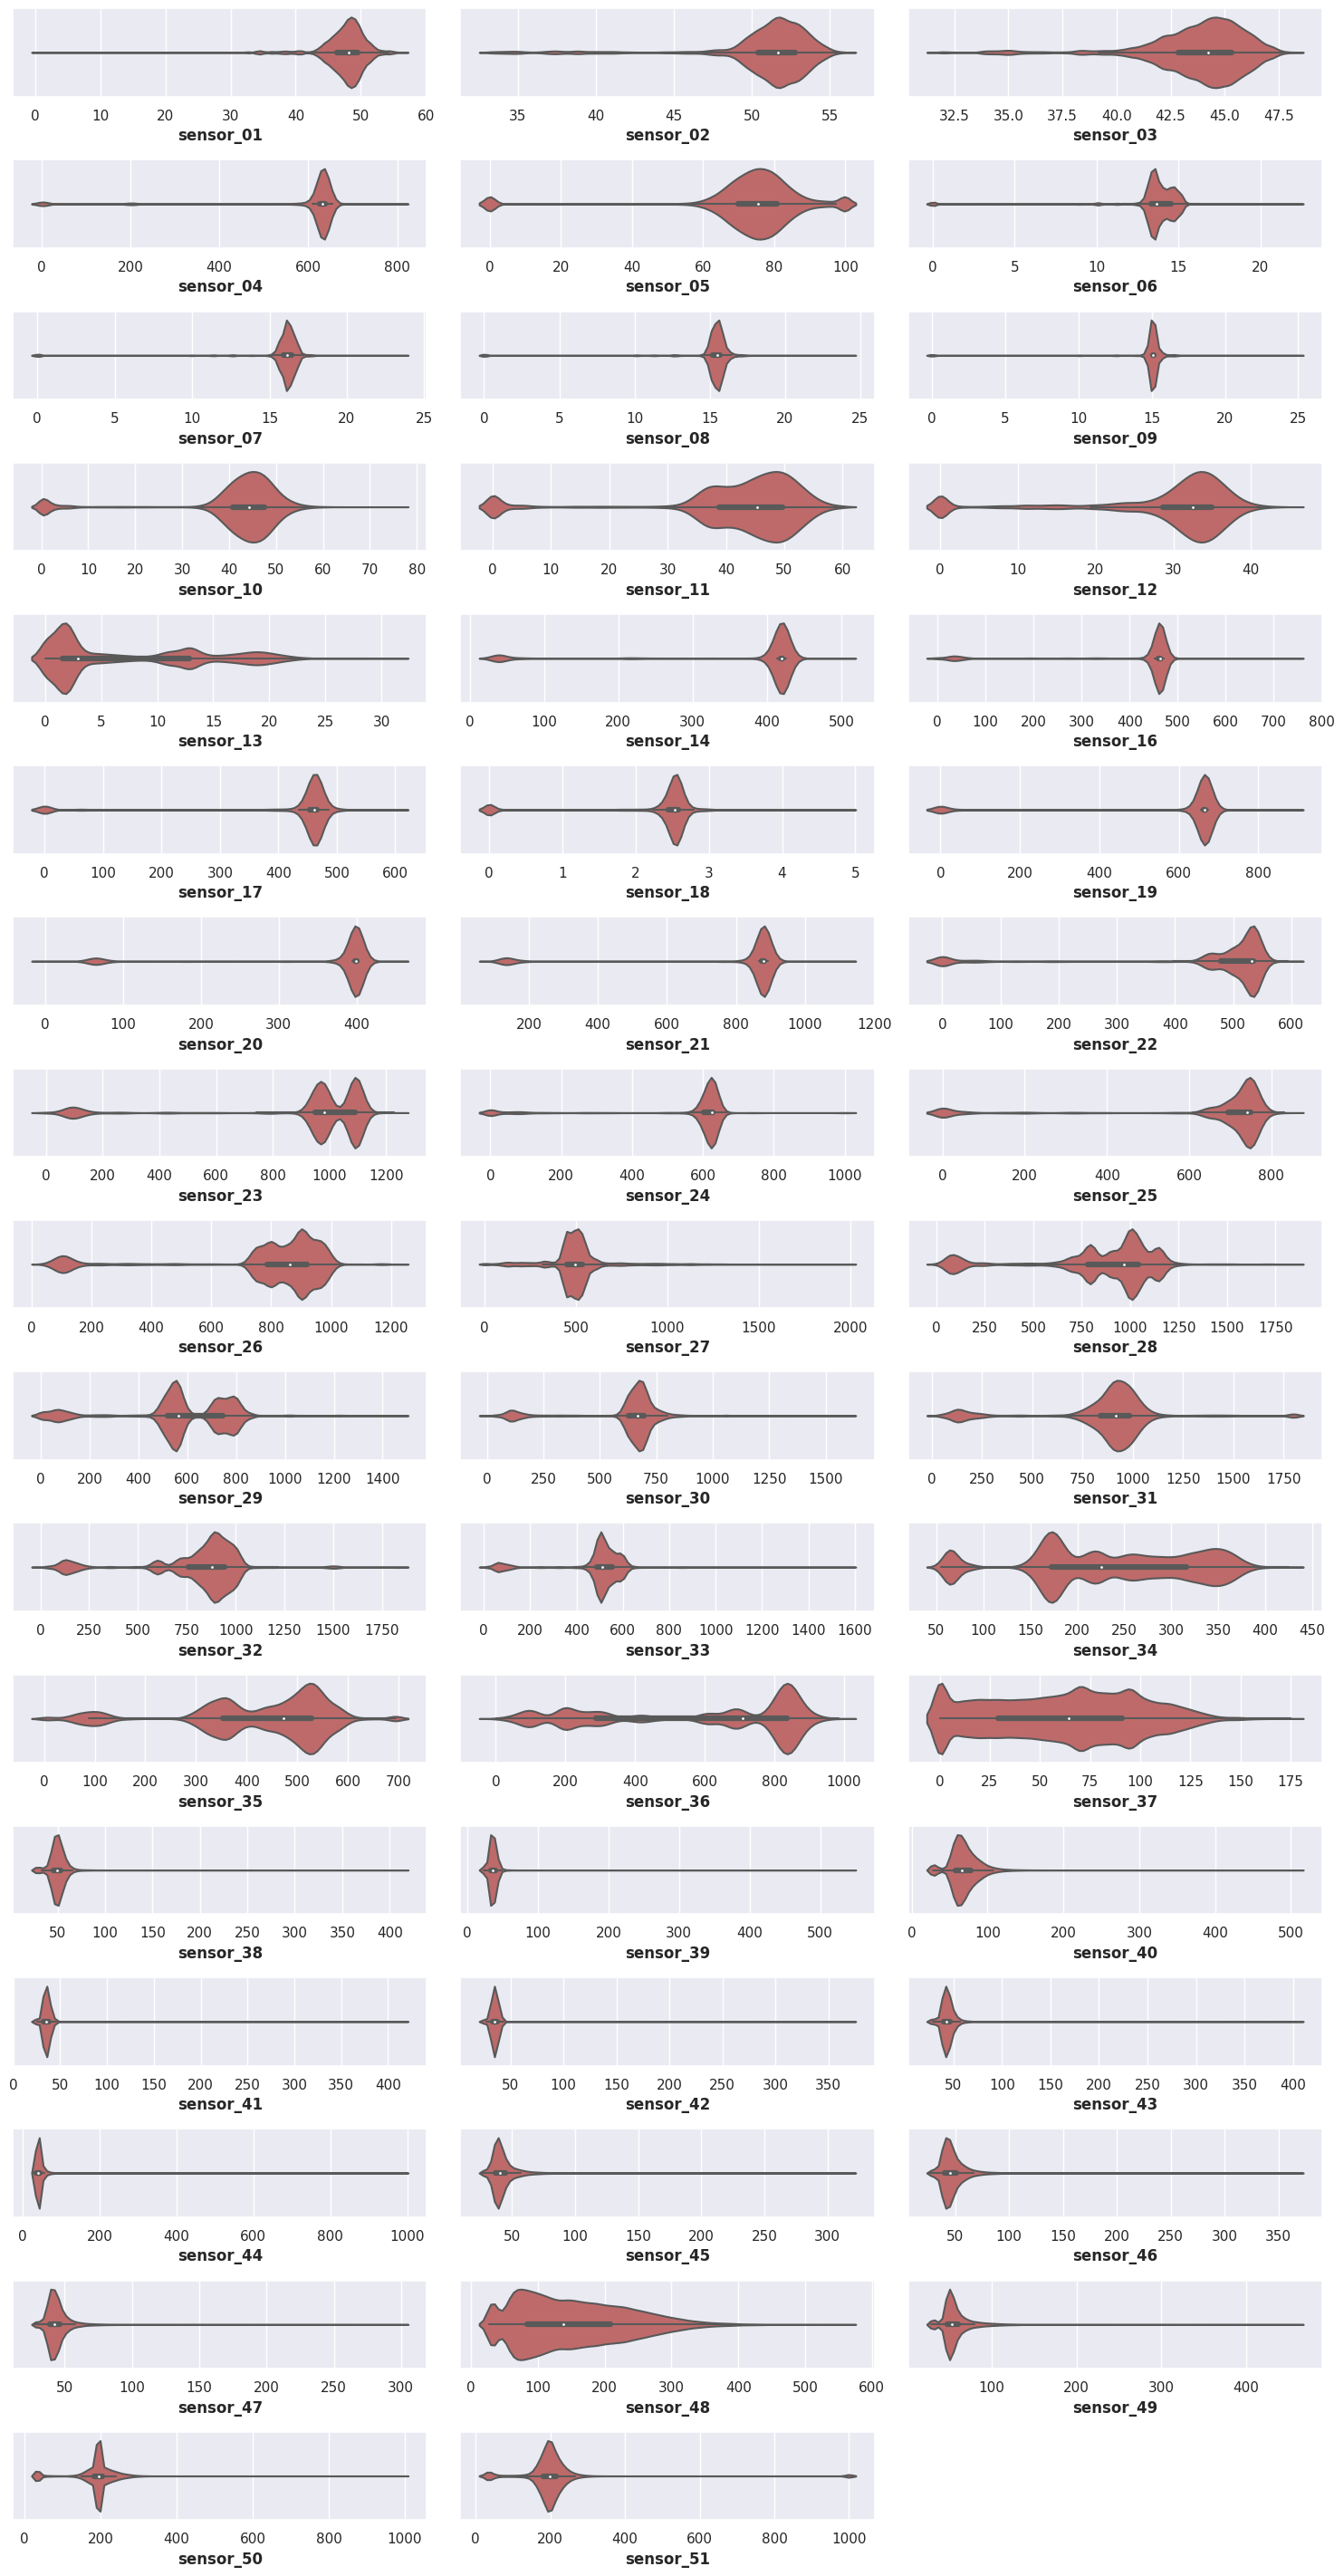

In [14]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(data.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.violinplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [15]:
# replace target column null value with most frequent catigory
data["machine_status"].fillna("NORMAL",inplace=True)

<Axes: ylabel='machine_status'>

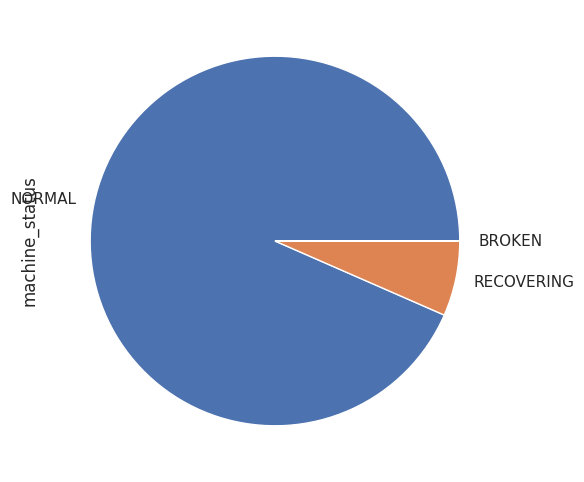

In [16]:
data["machine_status"].value_counts().plot.pie()

In [17]:
# model traning
data

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
5,2.453588,47.09201,53.168400,46.397568,637.615700,78.18568,13.41146,16.16753,15.89265,15.16204,39.29406,49.37051,32.23816,1.673484,418.9049,461.8948,461.9289,2.507935,663.4962,398.6428,872.4973,498.4064,974.6847,624.3462,739.2036,846.4617,429.6945,777.2820,700.7193,623.1481,734.3750,711.2128,438.6517,162.8758,333.7975,196.4579,90.84048,42.70833,31.77083,79.94791,30.989580,31.250000,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,54.16052,38.05424,13.265320,420.7993,463.2318,458.3615,2.499117,676.6655,405.7680,894.5920,543.5801,1109.5010,611.1745,700.5885,796.5964,692.1138,779.2067,485.0358,691.6666,974.9999,927.6135,477.3156,266.0334,578.5221,817.5707,0.00000,47.13541,29.16667,71.61458,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,193.8657,231.1921,NORMAL
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,54.52602,38.53485,13.242270,422.1567,463.1928,468.4388,2.618476,676.6547,406.2575,895.5599,541.7014,1106.3710,609.4917,698.4915,800.1906,697.8002,797.5571,510.9510,672.2222,927.0833,907.9463,487.8679,262.2222,568.1035,807.0151,0.00000,46.87500,28.90625,73.17708,30.208332,29.947920,38.28

In [18]:
data["machine_status"] = data["machine_status"].map({'NORMAL':0,'BROKEN':1,'RECOVERING':2})

In [19]:
numeric_features = data.select_dtypes(exclude="object").columns
print(numeric_features)

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status'],
      dtype='object')


In [20]:
# saprate dependent and indipendrnt features
x = data.drop('machine_status',axis=1)
y = data["machine_status"]

In [21]:
numeric_features = x.select_dtypes(exclude="object").columns
print(numeric_features)

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51'],
      dtype='object')


In [22]:
from imblearn.combine import SMOTETomek
# For Balancing The Target  Column
resample = SMOTETomek(sampling_strategy="auto")
X_res,y_res = resample.fit_resample(x,y)

In [23]:
X_res.shape

(609507, 51)

In [24]:
y_res.value_counts()

0    203169
1    203169
2    203169
Name: machine_status, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [26]:
# create num pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numeric_features)
])

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(487605, 51)
(121902, 51)
(487605,)
(121902,)


In [29]:
# transform data using preprocessor object
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [30]:
# now apply PCA to reduce dimension
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [31]:
X_train.shape
X_test.shape

(121902, 30)

In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import keras_tuner as kt

In [33]:
def build_model(hp):
  model = Sequential()

  counter = 0

  for i in range(hp.Int("num_layer",min_value=8,max_value=25)):
      if counter == 0:
        model.add(Dense(hp.Int("neuron"+str(i),min_value=8,max_value=200,step=8),
        activation = hp.Choice("activation"+str(i),values=["elu","leaky_relu"]),
        kernel_initializer = hp.Choice("initializer"+str(i),values=["glorot_uniform", "he_normal"]),
        input_dim = 30))

      else:
        model.add(Dense(hp.Int("neuron"+str(i),min_value=8,max_value=200,step=8),
        activation = hp.Choice("activation"+str(i),values=["elu","leaky_relu"]),
        kernel_initializer = hp.Choice("initializer"+str(i),values=["glorot_uniform", "he_normal"])))

      # # Add dropout after each dense layer
        dropout_rate = hp.Float("dropout_rate" + str(i), min_value=0.0, max_value=0.9, step=0.1)
        model.add(Dropout(rate=dropout_rate))

      # Add Batch Normalization after each hidden layer
      model.add(BatchNormalization())

      counter += 1

  model.add(Dense(3,activation="softmax"))
  OPTIMIZER = hp.Choice("optimizer",values=["rmsprop","adam"])
  # Use hp.Choice to select learning rate
  #learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-1, sampling="log")
  LOSS_FUNCTION = "sparse_categorical_crossentropy"
  METRICS = ["accuracy"]
  model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

  return model


In [34]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials=2,
    directory = "mydir"
)

In [35]:
tuner.search(X_train,y_train,epochs=2,validation_data=(X_test,y_test))

Trial 2 Complete [00h 08m 52s]
val_accuracy: 0.9927646517753601

Best val_accuracy So Far: 0.9949467778205872
Total elapsed time: 00h 17m 13s


In [36]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 14,
 'neuron0': 200,
 'activation0': 'leaky_relu',
 'initializer0': 'he_normal',
 'neuron1': 136,
 'activation1': 'leaky_relu',
 'initializer1': 'glorot_uniform',
 'dropout_rate1': 0.7000000000000001,
 'neuron2': 168,
 'activation2': 'leaky_relu',
 'initializer2': 'glorot_uniform',
 'dropout_rate2': 0.7000000000000001,
 'neuron3': 136,
 'activation3': 'leaky_relu',
 'initializer3': 'glorot_uniform',
 'dropout_rate3': 0.0,
 'neuron4': 16,
 'activation4': 'elu',
 'initializer4': 'he_normal',
 'dropout_rate4': 0.5,
 'neuron5': 16,
 'activation5': 'leaky_relu',
 'initializer5': 'glorot_uniform',
 'dropout_rate5': 0.0,
 'neuron6': 96,
 'activation6': 'elu',
 'initializer6': 'he_normal',
 'dropout_rate6': 0.30000000000000004,
 'neuron7': 48,
 'activation7': 'elu',
 'initializer7': 'he_normal',
 'dropout_rate7': 0.7000000000000001,
 'optimizer': 'adam',
 'neuron8': 8,
 'activation8': 'elu',
 'initializer8': 'glorot_uniform',
 'dropout_rate8': 0.0,
 'neuron9': 8,
 'activation9': 

In [37]:
model = tuner.get_best_models(num_models=1)[0]

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               6200      
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 136)               27336     
                                                                 
 dropout (Dropout)           (None, 136)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 136)               544       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 168)               2

In [41]:
history = model.fit(X_train,y_train,epochs=6,initial_epoch=2,validation_data=(X_test,y_test))

Epoch 3/6
15238/15238 [==============================] - 247s 16ms/step - loss: 0.0281 - accuracy: 0.9943 - val_loss: 0.0276 - val_accuracy: 0.9949
Epoch 4/6
15238/15238 [==============================] - 237s 16ms/step - loss: 0.0232 - accuracy: 0.9952 - val_loss: 0.0178 - val_accuracy: 0.9968
Epoch 5/6
15238/15238 [==============================] - 236s 16ms/step - loss: 0.0212 - accuracy: 0.9957 - val_loss: 0.0150 - val_accuracy: 0.9974
Epoch 6/6
15238/15238 [==============================] - 248s 16ms/step - loss: 0.0192 - accuracy: 0.9962 - val_loss: 0.0189 - val_accuracy: 0.9965


In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.028055,0.994270,0.027574,0.994881
1,0.023238,0.995230,0.017800,0.996809
2,0.021205,0.995695,0.015021,0.997375
3,0.019175,0.996196,0.018876,0.996497


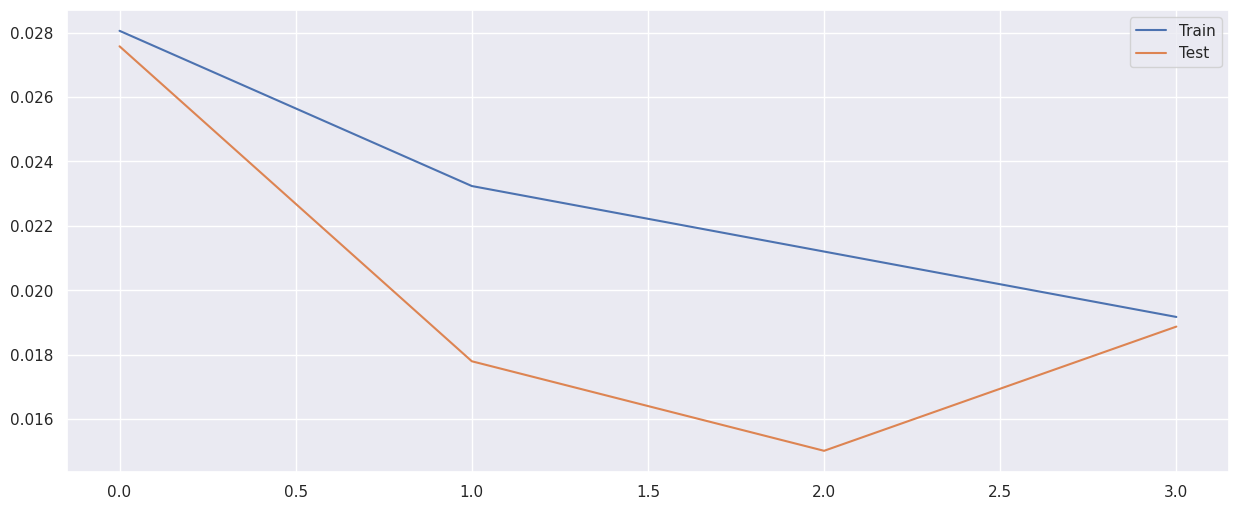

In [45]:
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.legend()
plt.show()

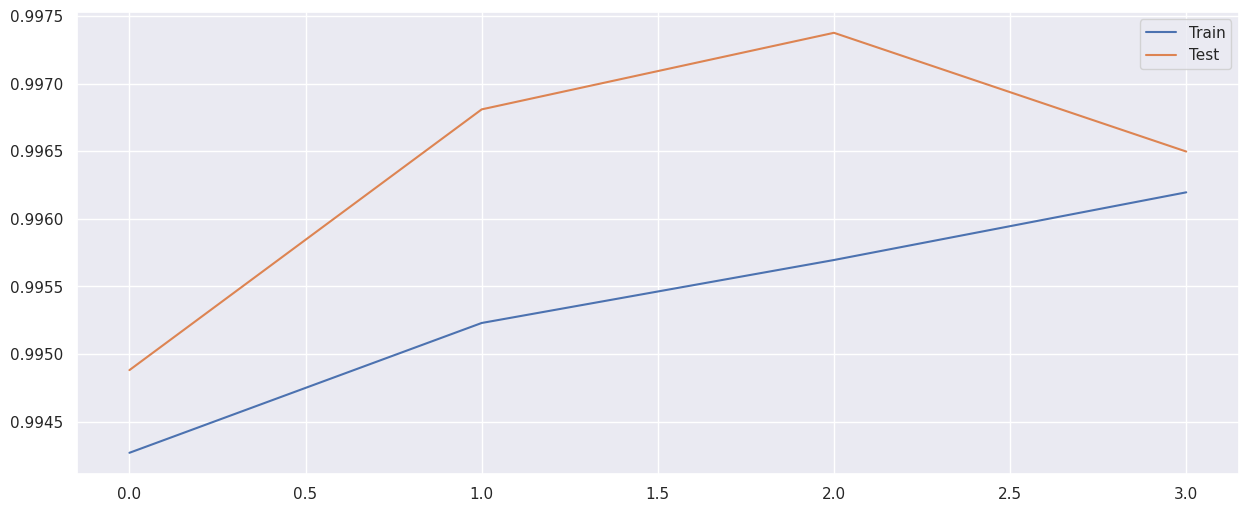

In [46]:
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.legend()
plt.show()

<Axes: >

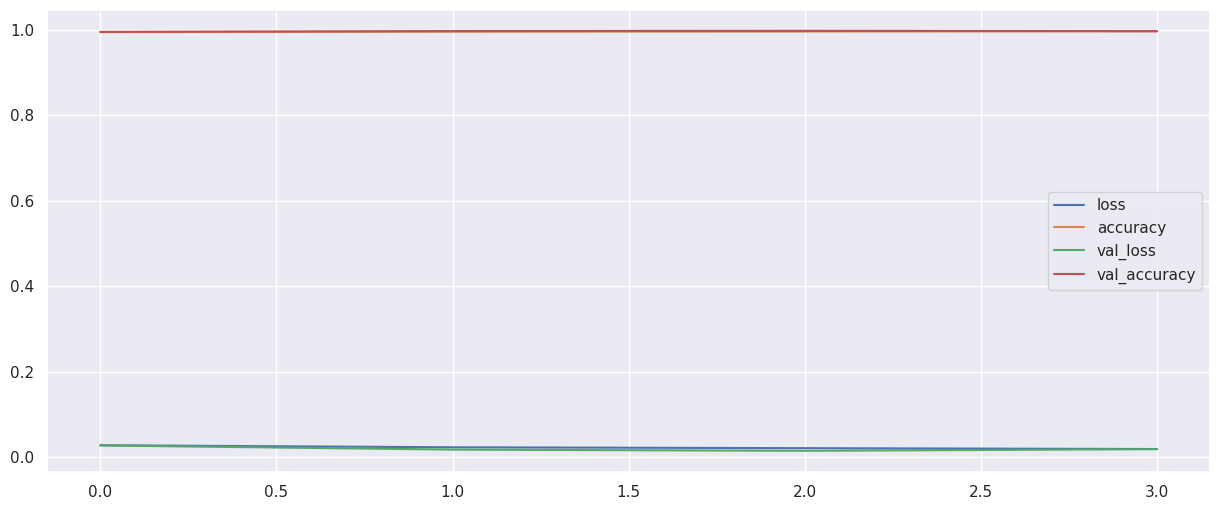

In [47]:
pd.DataFrame(history.history).plot()

In [40]:
  # !pip install -U keras_tuner